In [2]:
!pip install flask


[notice] A new release of pip available: 22.1.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, DrawCheckerboardProcessor, FillBackgroundProcessor
from PIL import Image, ImageDraw
from IPython.display import display

geometry = ImageProcessorPipeline(size=(512, 768))
geometry.addTask(DrawCheckerboardProcessor(
    size = (256, 384)
))
geometry.addTask(FillBackgroundProcessor(background = "white"))
image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import shapeGeometryPipeline, RandomChoiceArgument
from PIL import Image
from IPython.display import display


geom = shapeGeometryPipeline(size=(512, 768), background="lightgrey", shapes=10, foreground=RandomChoiceArgument(["black", "darkgrey"]), symmetry="none")
image = geom()
display(image)

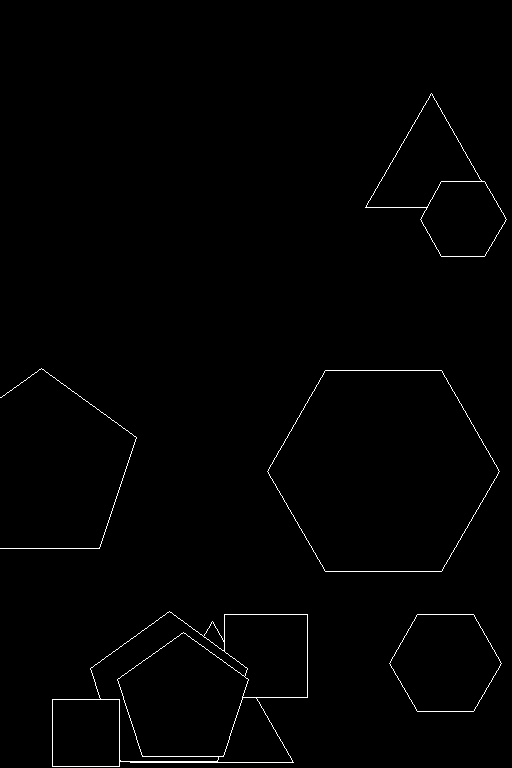

In [2]:
import path
path.setPathLocalNotebook()

from diffuserslib import shapeGeometryPipeline, RandomChoiceArgument
from IPython.display import display


geom = shapeGeometryPipeline(size=(512, 768), background="black", shapes=50, foreground="black", outline="white", symmetry="none", minsize=32, maxsize=128)
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import spiralGeometryPipeline
from PIL import Image
from IPython.display import display


geom = spiralGeometryPipeline(shapes=2, maxsize = 96)
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import checkerboardGeometryPipeline, SaturationProcessor, GaussianBlurProcessor, GaussianNoiseProcessor
from PIL import Image
from IPython.display import display


geom = checkerboardGeometryPipeline(size=(512, 768), background="lightgreen", foreground="magenta", blocksize=(512//3, 768//3), start = "white")
geom.addTask(SaturationProcessor(saturation=-0.5))
geom.addTask(GaussianNoiseProcessor(sigma=10))
geom.addTask(GaussianBlurProcessor(radius=2))
image = geom()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, SimpleTransformProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/test.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(SimpleTransformProcessor(type="rotate90"))

image = geometry()
display(image)


In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

In [ ]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, CannyEdgeProcessor, InitImageProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline()
geometry.addTask(InitImageProcessor(image))
geometry.addTask(CannyEdgeProcessor())

image = geometry()
display(image)

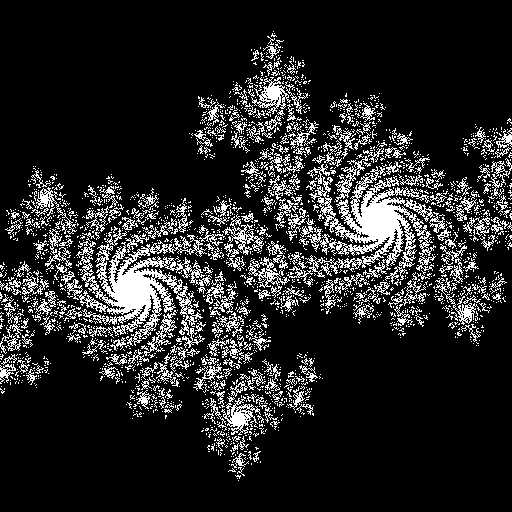

In [1]:
import path
path.setPathLocalNotebook()

from diffuserslib import ImageProcessorPipeline, DrawJuliaSetProcessor
from PIL import Image
from IPython.display import display

image = Image.open("data/rabbit.png")

geometry = ImageProcessorPipeline(size=(512, 512))
geometry.addTask(DrawJuliaSetProcessor(c_real=-0.7, c_imaginary=0.27015))

image = geometry()
display(image)